## 02-机器学习初探
### 1.什么是优化问题 optimization problem

#### Optimization 优化问题
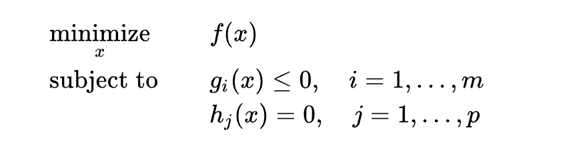

### 2.动态规划 dynamic programming
#### Cut rod problem
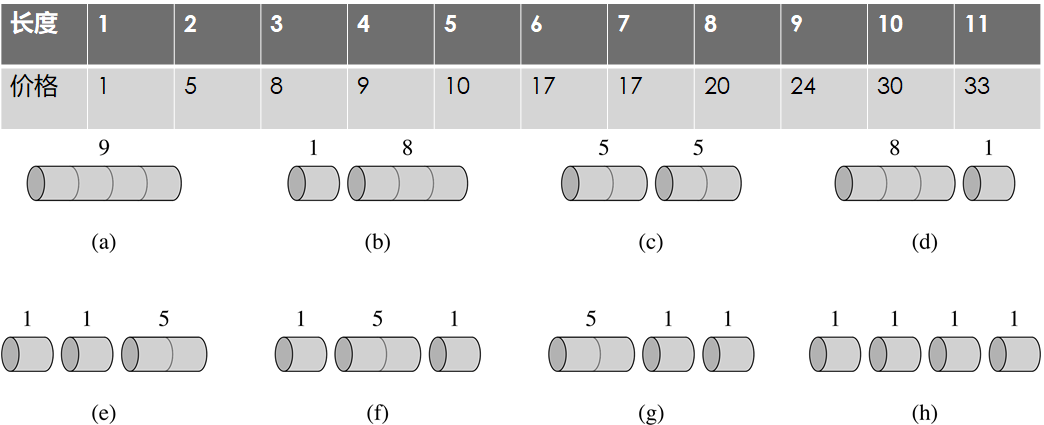

In [2]:
# 长度为1到11的价格
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 33]

In [3]:
len(original_price)

11

#### enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。举例：
#### 参数
#### sequence -- 一个序列、迭代器或其他支持迭代对象。
#### start -- 下标起始位置。
#### 返回值
#### 返回 enumerate(枚举) 对象。

In [4]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]

In [8]:
list(enumerate(seasons, start=1)) 

[(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [15]:
price = {i+1:p for i,p in enumerate(original_price)}
price

{1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30, 11: 33}

In [13]:
price = {i:p for i,p in enumerate(original_price,start=1)}
price

{1: 1, 2: 5, 3: 8, 4: 9, 5: 10, 6: 17, 7: 17, 8: 20, 9: 24, 10: 30, 11: 33}

#### 在Python中如果访问dict字典中不存在的键，会引发KeyError异常。但是有时候，字典中的每个键都存在默认值是非常方便的。defaultdict可以避免KeyError异常。
#### defaultdict类的初始化函数接受一个类型作为参数，当所访问的键不存在的时候，可以实例化一个值作为默认值默认值的类型由工厂函数决定。例如int str list set等。

In [40]:
from collections import defaultdict
price = defaultdict(int)
price[20]

0

In [41]:
for i,p in enumerate(original_price): price[i+1] = p

#### 匿名函数，lambda表达式

In [25]:
some_numbers = [(1,2),(2,1),(-1,4)]
sorted(some_numbers,key=lambda x:x[0])

[(-1, 4), (1, 2), (2, 1)]

In [57]:
## decorator
from datetime import datetime
import time

def func_1(n):
    begin = datetime.now()
    time.sleep(1)
    print(f'used time = {datetime.now()-begin}')
    return n

In [58]:
def func_2(n):
    begin = datetime.now()
    sum_ = 0
    for i in range(n**n):
        sum_ +=1
    print(f'used time = {datetime.now()-begin}')   
    return n

#### python是一个可以面向对象的编程语言

In [59]:
def get_func_time(func):
    def _wrap(n):
        begin = datetime.now()
        result = func(n)
        print(f'used time = {datetime.now()-begin}')   
        
        return result
    return _wrap

In [61]:
func_1(0)

used time = 0:00:01.001065


0

In [70]:
@get_func_time
def func_1(n):
    time.sleep(1)
    return n
def func_2(n):
    sum_ = 0
    for i in range(n**n):
        sum_ +=1  
    return n

In [74]:
func_1(5)

used time = 0:00:01.001093


5

In [75]:
func_2(5)

5

In [66]:
func_1_with_time = get_func_time(func_1)

'''
@another_func
def some_func():
    pass
    
==>some_func = another(some_func)
'''

In [67]:
func_1_with_time(9)

used time = 0:00:01.001065


9

In [68]:
func_2_with_time = get_func_time(func_2)

In [69]:
func_2_with_time(9)

used time = 0:00:17.777611


9

In [76]:
def memo(func):
    cache = {}
    def _wrap(n):
#     def _wrap(*args,**kwargs):
        if n in cache: result=cache[n]
        else:
            result = func(n)
            cache[n] = result
        
        return result
    return _wrap

In [83]:
solution = {}

# the revenue收入 of length n
@memo
def r(n):
    candidates = []
#     for i in range(1,n):
#         candidates.append((r(i) + r(n-i),i))
    
#     candidates.append((price[n],0))
    
#     max_price,split_point = max(candidates,key=lambda x:x[0])
    
    max_price,split_point = max([(price[n],0)]+[(r(i) + r(n-i),i) for i in range(1,n)],key=lambda x:x[0])
    
    global sulotion
    solution[n] = (split_point,n-split_point)
    
    return max_price

In [46]:
%%time
r(13)

CPU times: user 630 ms, sys: 985 µs, total: 631 ms
Wall time: 629 ms


38

#### 随着n的增长，运行时间呈指数倍增长，运行过程中重复子问题较多
#### 不断的写表查表法，dynamic programming，后翻译为动态规划
#### decorator 装饰器，可用装饰器缩减运行时间

In [47]:
%%time
r(15)

CPU times: user 5.68 s, sys: 2.86 ms, total: 5.68 s
Wall time: 5.68 s


43

In [84]:
%%time
r(155)

CPU times: user 7.75 ms, sys: 6 µs, total: 7.76 ms
Wall time: 7.47 ms


465

In [85]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11),
 12: (2, 10),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (6, 10),
 17: (6, 11),
 18: (2, 16),
 19: (2, 17),
 20: (10, 10),
 21: (10, 11),
 22: (11, 11),
 23: (2, 21),
 24: (2, 22),
 25: (3, 22),
 26: (6, 20),
 27: (6, 21),
 28: (6, 22),
 29: (2, 27),
 30: (10, 20),
 31: (10, 21),
 32: (10, 22),
 33: (11, 22),
 34: (2, 32),
 35: (2, 33),
 36: (3, 33),
 37: (6, 31),
 38: (6, 32),
 39: (6, 33),
 40: (10, 30),
 41: (10, 31),
 42: (10, 32),
 43: (10, 33),
 44: (11, 33),
 45: (2, 43),
 46: (2, 44),
 47: (3, 44),
 48: (6, 42),
 49: (6, 43),
 50: (10, 40),
 51: (10, 41),
 52: (10, 42),
 53: (10, 43),
 54: (10, 44),
 55: (11, 44),
 56: (2, 54),
 57: (2, 55),
 58: (3, 55),
 59: (6, 53),
 60: (10, 50),
 61: (10, 51),
 62: (10, 52),
 63: (10, 53),
 64: (10, 54),
 65: (10, 55),
 66: (11, 55),
 67: (2, 65),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (10, 61

In [86]:
def not_cut(n):return n==0

In [102]:
def parse_solution(target_length,revenue_solution):
    left,right = revenue_solution[target_length]
    
    if not_cut(left): return [right]
    
    return parse_solution(left,revenue_solution) + parse_solution(right,revenue_solution)

In [112]:
r(150)

450

In [111]:
parse_solution(150,solution)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

### 总结动态规划 dynamic programming
### 解决具备一定限制条件的最优问题
#### 1.这个问题可以被分割成若干子问题
#### 2.子问题之间存在overlapping重合
#### 3.对重合子问题进行cache(缓存)
#### 4.依据cache加速解决问题
#### 5.还需要构建parse solution函数解析最终的结果
### 问题举例
#### 1.Edit Distance 编辑距离
#### 2.基因测序里边的相似基因判断
#### 3.图形学里的覆盖问题
#### 4.动态规划

### 3.梯度下降 gradient descent 

#### 监督学习涉及梯度下降
#### loss=(f(x)-y)^2, 为使loss函数最小
#### 对于机器学习，loss函数是凸函数
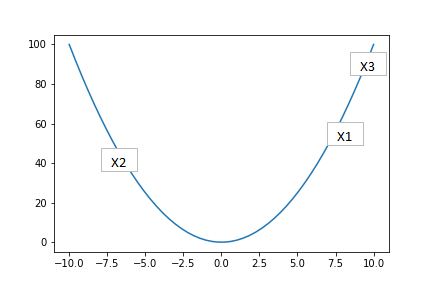

#### 在x1处，$$ \frac{\partial{y}}{\partial{x}} > 0 $$  y随x增大而增大，为求最小值，$$ xnew = x1 + (-1) * \frac{\partial{y}}{\partial{x}} $$
#### 在x2处，$$ \frac{\partial{y}}{\partial{x}} < 0 $$  y随x增大而减小，为求最小值，$$ xnew = x2 + (-1) * \frac{\partial{y}}{\partial{x}} $$
#### 在x3处，函数偏导数比较大，$$ xnew = x3 + (-1) * \frac{\partial{y}}{\partial{x}} $$ xnew退到到离x3左边很远的地方，为避免这种情况的发生，会加入learning rate ，假设领alpha=10^(-4),$$ xnew = x3 + (-1) * \frac{\partial{y}}{\partial{x}}\alpha $$ 此时可以避免上述情况
#### 因此，梯度下降函数如下：$$ x = x + (-1)*\frac{\partial{y}}{\partial{x}}\alpha $$

In [121]:
import numpy as np

In [122]:
def func(x):
    return 10*x**2 + 37*x + 9

In [128]:
def gradient(x):
    return 20*x + 37

In [123]:
import matplotlib.pyplot as plt

In [124]:
x = np.linspace(-10,10)

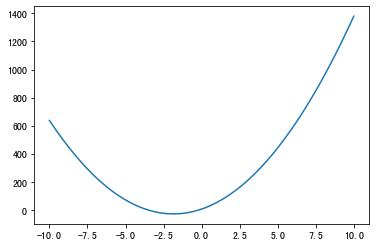

In [125]:
plt.plot(x,func(x))

In [126]:
import random

steps = []

x_optimal = random.choice(x)

In [127]:
x_optimal

6.326530612244898

In [132]:
alpha = 1e-3

for i in range(200):
    x_optimal += (-1)*gradient(x_optimal)*alpha
    steps.append(x_optimal)

In [133]:
for s in steps:
    print(s,func(s))

6.163 616.8566900000001
6.00274 591.4302550760001
5.8456852 567.0107069749904
5.691771496 543.5581729787808
5.54093606608 521.0343593288211
5.393117344758401 499.4024886993998
5.248254997863232 478.62724014690355
5.106289897905968 458.67469143708615
4.967164099947849 439.5122636561776
4.830820817948892 421.108668015393
4.697204401589914 403.4338547619835
4.566260313558116 386.4589641134089
4.437935107286954 370.156279134518
4.312176405141215 354.4991804807911
4.188932877038391 339.46210293375174
4.068154219497623 325.0204936575751
3.94979113510767 311.15077210873517
3.833795312405517 297.83029153322923
3.7201194061574063 285.0373019885134
3.608717018034258 272.75091482976825
3.4995426776735727 260.9510686025094
3.392551824120101 249.61849628585003
3.287700787637699 238.73469383293033
3.1849467718849453 228.28188995714632
3.0842478364472465 218.24301711484333
2.9855628797183016 208.60168363709553
2.8888516221239358 199.34214696506658
2.794074589681457 190.44928794524995
2.70119309788782

### 4.什么是机器学习 machine learing

#### Supervised  Learning 监督式学习
#### >>Regrsssion 回归 邮件真假的可能性，和本人的相关程度
#### >>Binary Classification 二分类  邮件真假
#### >>Multiclass Classification 多分类 邮件类型：广告邮件，家庭邮件，工作邮件。。。
#### >>Sequence Learning 根据邮件，生成一段文字
#### >>Rank 排序 10封邮件重要紧急程度的排序
#### Unsupervised Learning 非监督学习
#### >>cluster 聚类

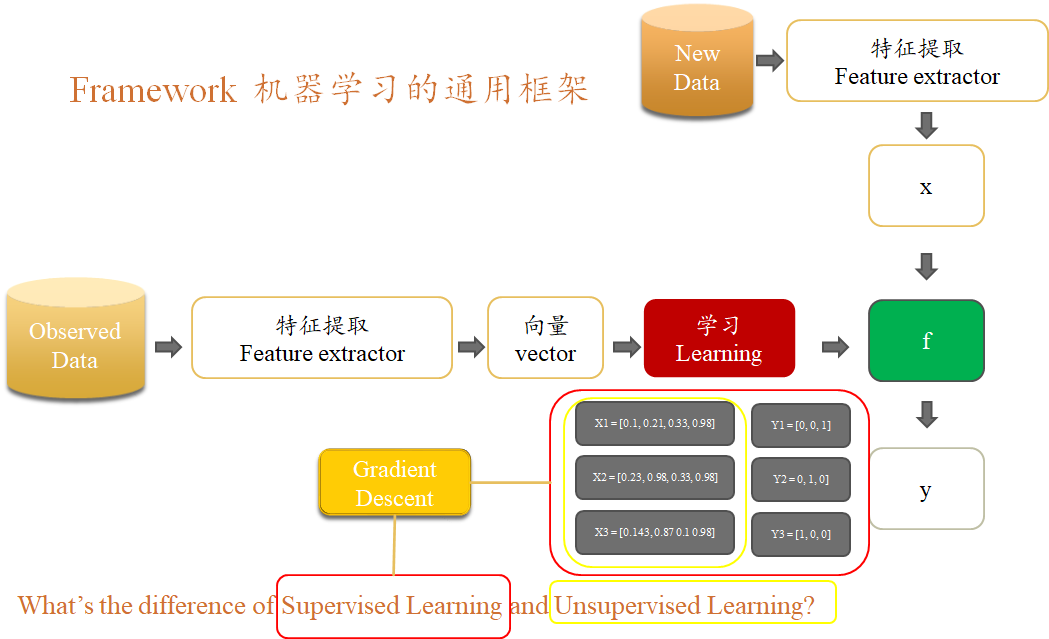

#### What’s the difference of Supervised Learning and Unsupervised Learning?
#### >>监督学习，给定x,y
#### >>非监督学习，只给定x

#### 浅谈如何提升算法工程师将现实问题抽象解决的能力？
#### >>1.这就需要理论与实践相结合，在实际工作中，首先要积累一定的机器学习算法，在有一定基础的问题上去思考问题
#### >>2.现阶段好好听课，结合老师的经验学到更多的方法，在工作中多思考多积累，争取早日理论和实践相结合。
#### 机器学习只能解决部分问题，或者我们需要只是机器学习整体过程中的部分功能，这给我们什么启示？
#### 这句话说明，机器学习并不是说能解决所有的问题，不要照搬套路，要针对问题本身去思考，不要轻易的给机器学习以及问题设限，多尝试，多思考

### 5.特征、模型和预测 feature、model、predicate
#### 特征提取 把观测数据变成计算机可以读取的向量的过程
#### 模型 通过学习得到的产出函数f
#### 预测 新的数据进入到模型，得到其y的过程

### 6.什么是向量距离 vector distance
+ 球面距离 GeoDistant

+ 余弦距离 Cosine Distance

+ 欧几里得距离 Euclidean Distance

+ 曼哈顿距离 Manhattan distance or Manhattan length 城市距离，街区距离
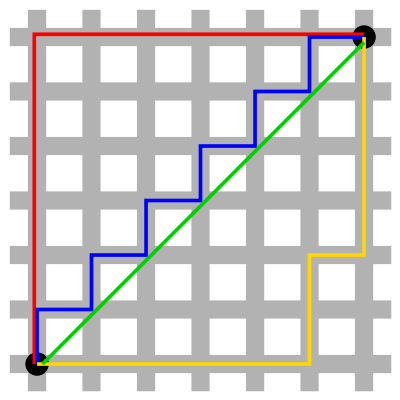

### 7.k-means聚类
#### k对应需要聚类的类别数，means取平均
#### 先随机取k个点，根据距离分为k类，每一个类对应取平均，新的平均值即为新的中心点，以上过程不断迭代，直至中心点稳定
## 实例，给中国的省会设置能源点

In [134]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [135]:
import re

In [137]:
test_string = "{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},"

#### re 模块的一般使用步骤如下：

#### 1.使用 compile 函数将正则表达式的字符串形式编译为一个 Pattern 对象
#### 2.通过 Pattern 对象提供的一系列方法对文本进行匹配查找，获得匹配结果（一个 Match 对象）
#### 3.最后使用 Match 对象提供的属性和方法获得信息，根据需要进行其他的操作
#### 在进行search,match等操作前不适用compile函数，会导致重复使用模式时，需要对模式进行重复的转换。降低匹配速度。而此种方法的调用方式，更为直观。

In [140]:
pattern = re.compile('\d+.\d+') #decimal十进制

In [141]:
pattern.findall(test_string)

['87.68', '43.77']

In [155]:
#\w 匹配包括下划线的任何单词字符，数字字母下划线，汉子是字符，在计算机里是以ascii码表示，因此\w可以匹配到汉子
#\s 代表空白符或制表符
#\d 代表单个数字
# +代表匹配次数，至少匹配一次
pattern = re.compile("name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [145]:
pattern.findall(test_string)

[('乌鲁木齐', '87.68', '43.77')]

In [148]:
city_location = {}

In [153]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)

    # city_info为空时，为False,not city_info为True,执行continue,跳出本轮循环，继续下一次循环
    # 反之city_info非空时，不执行continue，执行后边语句
    if not city_info:continue
    
    city_name,long,lat = city_info[0]
    
    long,lat = float(long),float(lat)
    
    city_location[city_name] =[long,lat]

In [154]:
city_location

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '海口': [110.35, 20.02],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '台湾': [121.3, 25.03],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '西藏': [91.11, 29.97],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [156]:
import math

In [157]:
def geo_distance(origin, destination):
    #球面距离
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lon1, lat1 = origin
    lon2, lat2 = destination
    radius = 6371  # km，地球半径

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [158]:
geo_distance(city_location['上海'],city_location['杭州'])

163.0760821403945

In [189]:
from pylab import mpl

# mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [190]:
import networkx as nx

In [191]:
city_graph = nx.Graph()

In [192]:
city_graph.add_nodes_from(list(city_location.keys()))

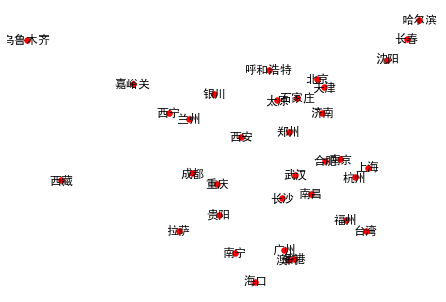

In [193]:
nx.draw(city_graph,city_location,with_labels=True,node_size=30)

In [201]:
# all_x,all_y=[],[]

# for _,location in city_location.items():
#     x,y = location
    
#     all_x.append(x)
#     all_y.append(y)
Xs = np.array(list(city_location.values()))
Xs

array([[103.73,  36.03],
       [ 98.17,  39.47],
       [101.74,  36.56],
       [104.06,  30.67],
       [114.48,  38.03],
       [102.73,  25.04],
       [106.71,  26.57],
       [114.31,  30.52],
       [113.65,  34.76],
       [117.  ,  36.65],
       [118.78,  32.04],
       [117.27,  31.86],
       [120.19,  30.26],
       [115.89,  28.68],
       [119.3 ,  26.08],
       [113.23,  23.16],
       [113.  ,  28.21],
       [110.35,  20.02],
       [123.38,  41.8 ],
       [125.35,  43.88],
       [126.63,  45.75],
       [112.53,  37.87],
       [108.95,  34.27],
       [121.3 ,  25.03],
       [116.46,  39.92],
       [121.48,  31.22],
       [106.54,  29.59],
       [117.2 ,  39.13],
       [111.65,  40.82],
       [108.33,  22.84],
       [ 91.11,  29.97],
       [106.27,  38.47],
       [ 87.68,  43.77],
       [114.17,  22.28],
       [113.54,  22.19]])

#### FeatureExtractor Finished

#### 找到合理的能源中心

In [286]:
def get_random_center(all_x,all_y):
    return random.uniform(min(all_x),max(all_x)),random.uniform(min(all_y),max(all_y))
all_x=Xs[:,0]
all_y=Xs[:,1]

K = 5
threshold = 3

centers = {f'{i+1}': get_random_center(all_x,all_y) for i in range(K)}

the_first_center = {k:v for k,v in centers.items()}

In [258]:
centers

{'1': (99.5494597826733, 42.12711161717312),
 '2': (115.36802497911634, 24.39387748966791),
 '3': (88.48508119015332, 24.458502023949855),
 '4': (88.4646495675905, 24.395890314121388),
 '5': (113.98090965599435, 26.477607847372006)}

In [259]:
for x,y in zip(all_x,all_y):
    for k in centers:
#         print (k)
        print (geo_distance((x, y),centers[k]))
#         print (centers[k])
#         print ((k,geo_distance((x, y),centers[k]))

767.7696257002856
1707.324645743444
1944.7661496845838
1951.1527795469215
1439.5887230096953
317.44312778923177
2324.99959278868
1900.0013674259349
1907.161260377548
2058.4389093234513
646.9945432890136
1876.3083950262208
1846.3492577406173
1853.0082052196929
1610.7182234443546
1335.859131699571
1314.2015900843353
1681.3048005021287
1686.3812737644873
1074.4981794908
1347.340211791855
1518.5942845145994
2880.1957987887677
2886.0995042340087
1285.4180923756783
1922.3155479186805
1278.0942045985694
1439.2640594379675
1442.0127463074277
1137.6235709364748
1848.786985870149
901.9000449784904
1842.294280208969
1845.6878106016436
723.3698933270812
1842.6369639914312
689.1330475459673
2628.442455847691
2632.836903385546
450.6415453399838
1473.1365454155934
1164.5085406089643
2678.72870523263
2684.1044751524632
921.5022532559041
1614.838611052831
1371.6851295866304
3032.294264451067
3037.8482260057554
1166.5267939184823
2034.1172801418058
913.4015966310503
3073.3227973028697
3077.9340138374287

In [260]:
changed = True

while changed:
    closet_points = defaultdict(list)
    for x,y in zip(all_x,all_y):
        # 遍历all_x,all_y，找到每个点最近的中心点
    #         for k in centers:
    #             print((k,geo_distance((x, y),centers[k])))  #('1', 1115.0335794011582)
        # key取距离
        closet_c,closet_dis = min([(k,geo_distance((x, y),centers[k])) for k in centers], key=lambda t: t[1])
    #         print(f'for {x},{y} the closed center is {closet_c}') #for 103.73,36.03 the closed center is 1
        closet_points[closet_c].append([x,y])

    changed = False
    for c in closet_points:
        former_center = centers[c] # 原来的中心点

        neigbors_belong_to_c = closet_points[c] # 得到划分到中心点c的点

        neigbors_center = np.mean(neigbors_belong_to_c,axis=0) # 聚的类取均值

        if geo_distance(neigbors_center,former_center)>threshold:
            print(f"Updated:{c} center")
            centers[c] = neigbors_center # 距离大于某一阈值，更新中心点
            changed = True

Updated:1 center
Updated:5 center
Updated:2 center
Updated:3 center
Updated:1 center
Updated:5 center
Updated:3 center
Updated:2 center
Updated:1 center
Updated:3 center
Updated:5 center
Updated:2 center
Updated:3 center
Updated:5 center
Updated:1 center
Updated:2 center
Updated:4 center
Updated:3 center
Updated:5 center
Updated:1 center
Updated:2 center
Updated:5 center
Updated:2 center
Updated:3 center
Updated:2 center
Updated:5 center


In [261]:
centers

{'1': array([118.29777778,  40.42777778]),
 '2': array([109.45   ,  23.96125]),
 '3': array([100.275,  37.495]),
 '4': array([91.11, 29.97]),
 '5': array([116.73818182,  30.26636364])}

In [265]:
closet_points

defaultdict(list,
            {'3': [[103.73, 36.03],
              [98.17, 39.47],
              [101.74, 36.56],
              [104.06, 30.67],
              [106.27, 38.47],
              [87.68, 43.77]],
             '1': [[114.48, 38.03],
              [117.0, 36.65],
              [123.38, 41.8],
              [125.35, 43.88],
              [126.63, 45.75],
              [112.53, 37.87],
              [116.46, 39.92],
              [117.2, 39.13],
              [111.65, 40.82]],
             '2': [[102.73, 25.04],
              [106.71, 26.57],
              [113.23, 23.16],
              [110.35, 20.02],
              [106.54, 29.59],
              [108.33, 22.84],
              [114.17, 22.28],
              [113.54, 22.19]],
             '5': [[114.31, 30.52],
              [113.65, 34.76],
              [118.78, 32.04],
              [117.27, 31.86],
              [120.19, 30.26],
              [115.89, 28.68],
              [119.3, 26.08],
              [113.0, 28.21],
     

In [267]:
centers.values()

dict_values([array([118.29777778,  40.42777778]), array([109.45   ,  23.96125]), array([100.275,  37.495]), array([91.11, 29.97]), array([116.73818182,  30.26636364])])

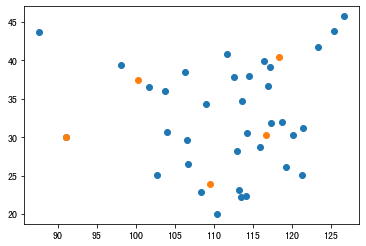

In [266]:
plt.scatter(all_x,all_y)
plt.scatter([x for x,y in centers.values()],[y for x,y in centers.values()])

In [270]:
*centers.values()

SyntaxError: can't use starred expression here (<ipython-input-270-743a388df7e3>, line 4)

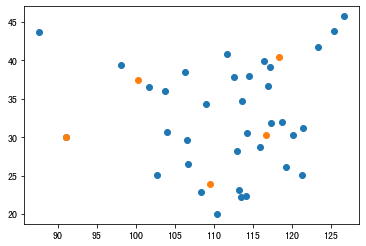

In [271]:
plt.scatter(*[all_x,all_y])
plt.scatter(*zip(*centers.values()))

In [275]:
city_location_with_station = {
    f'能源站-{int(i)+1}':position for i,position in centers.items()
}

In [276]:
city_location_with_station

{'能源站-2': array([118.29777778,  40.42777778]),
 '能源站-3': array([109.45   ,  23.96125]),
 '能源站-4': array([100.275,  37.495]),
 '能源站-5': array([91.11, 29.97]),
 '能源站-6': array([116.73818182,  30.26636364])}

In [298]:
def draw_cities(cities,color=None):
    city_graph = nx.Graph()
    city_graph.add_nodes_from(list(cities.keys()))
    nx.draw(city_graph,cities,node_color=color,with_labels=True,node_size=30)

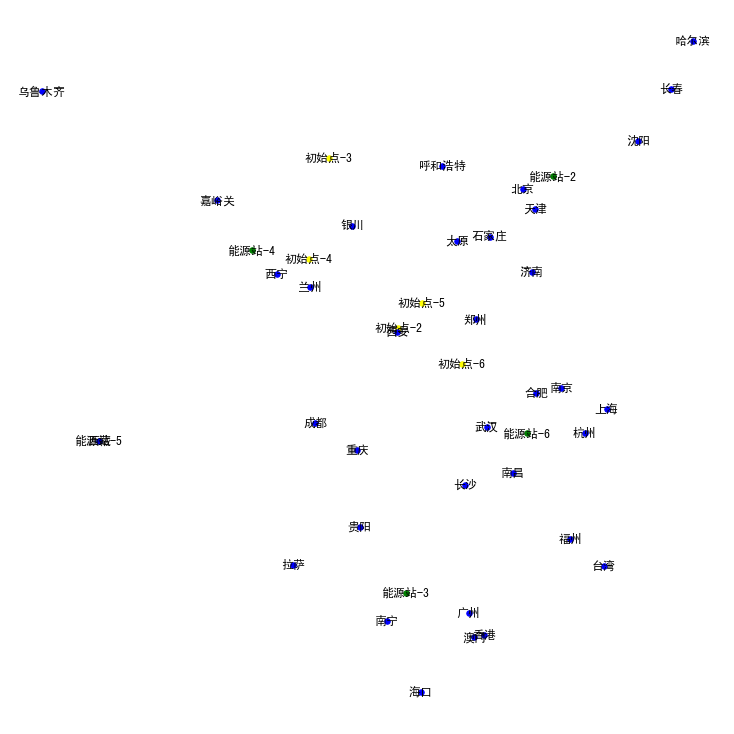

In [299]:
plt.figure(1,figsize=(10,10))
draw_cities({f'初始点-{int(i)+1}':p for i,p in the_first_center.items()},color='yellow')
draw_cities(city_location_with_station,color='green')
draw_cities(city_location,color='blue')

In [293]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(Xs)

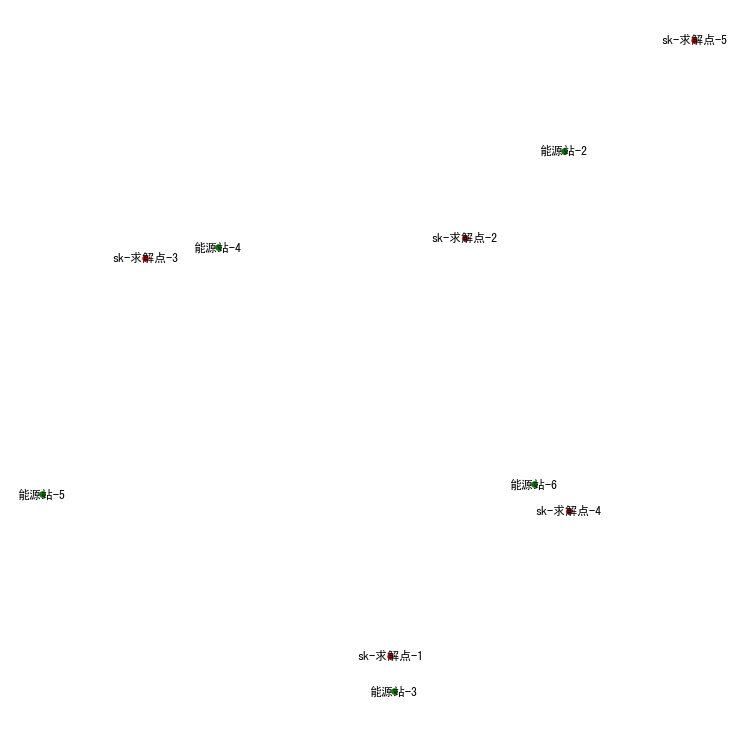

In [301]:
plt.figure(1,figsize=(10,10))
# draw_cities({f'初始点-{int(i)+1}':p for i,p in the_first_center.items()})
draw_cities({f'sk-求解点-{int(i)+1}':p for i,p in enumerate(kmeans.cluster_centers_)},color='red')
draw_cities(city_location_with_station,color='green')
# draw_cities(city_location)